In [4]:
import pandas as pd
import datetime as dt
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [5]:
path = "Brent_crude_oil.csv"

In [6]:
brent_df=pd.read_csv(path)

In [8]:
brent_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/01/2010,80.120003,79.820000,80.120003,80.120003,80.120003,97.0
1,5/01/2010,80.589996,80.260002,80.589996,80.589996,80.589996,97.0
2,6/01/2010,81.129997,81.699997,80.129997,81.889999,81.889999,7.0
3,7/01/2010,81.510002,81.510002,81.629997,81.510002,81.510002,7.0
4,8/01/2010,81.370003,81.529999,81.089996,81.370003,81.370003,7.0
5,10/01/2010,NaN,NaN,NaN,NaN,NaN,NaN
6,11/01/2010,80.970001,81.709999,81.010002,80.970001,80.970001,7.0
7,12/01/2010,79.300003,79.300003,79.029999,79.300003,79.300003,7.0
8,13/01/2010,78.529999,79.019997,77.250000,78.309998,78.309998,18.0
9,14/01/2010,77.820000,78.470001,78.010002,77.820000,77.820000,6.0


In [9]:
brent_df.shape

(3067, 7)

In [10]:
brent_df.isna().sum()

Date           0
Open         582
High         582
Low          582
Close        582
Adj Close    582
Volume       582
dtype: int64

In [11]:
brent_df.dropna(inplace = True)

In [12]:
brent_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
brent_df.shape

(2485, 7)

In [14]:
df1=brent_df.copy()

In [15]:
df1["Date"]=pd.to_datetime(brent_df["Date"],format='%d/%m/%Y')
df1.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,80.120003,79.820000,80.120003,80.120003,80.120003,97.0
1,2010-01-05,80.589996,80.260002,80.589996,80.589996,80.589996,97.0
2,2010-01-06,81.129997,81.699997,80.129997,81.889999,81.889999,7.0
3,2010-01-07,81.510002,81.510002,81.629997,81.510002,81.510002,7.0
4,2010-01-08,81.370003,81.529999,81.089996,81.370003,81.370003,7.0
6,2010-01-11,80.970001,81.709999,81.010002,80.970001,80.970001,7.0
7,2010-01-12,79.300003,79.300003,79.029999,79.300003,79.300003,7.0
8,2010-01-13,78.529999,79.019997,77.250000,78.309998,78.309998,18.0
9,2010-01-14,77.820000,78.470001,78.010002,77.820000,77.820000,6.0
10,2010-01-15,77.550003,77.820000,76.879997,77.110001,77.110001,4.0


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2485 entries, 0 to 3066
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2485 non-null   datetime64[ns]
 1   Open       2485 non-null   float64       
 2   High       2485 non-null   float64       
 3   Low        2485 non-null   float64       
 4   Close      2485 non-null   float64       
 5   Adj Close  2485 non-null   float64       
 6   Volume     2485 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 155.3 KB


In [17]:
hist=df1.set_index('Date')
hist

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,80.120003,79.820000,80.120003,80.120003,80.120003,97.0
2010-01-05,80.589996,80.260002,80.589996,80.589996,80.589996,97.0
2010-01-06,81.129997,81.699997,80.129997,81.889999,81.889999,7.0
2010-01-07,81.510002,81.510002,81.629997,81.510002,81.510002,7.0
2010-01-08,81.370003,81.529999,81.089996,81.370003,81.370003,7.0
...,...,...,...,...,...,...
2020-01-30,59.610001,59.610001,57.730000,58.290001,58.290001,17435.0
2020-01-31,59.070000,59.529999,57.980000,58.160000,58.160000,578.0
2020-02-03,58.200001,58.200001,58.200001,58.200001,58.200001,66338.0


In [92]:
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'Close'

In [93]:
hist.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,80.120003,79.820000,80.120003,80.120003,80.120003,97.0
2010-01-05,80.589996,80.260002,80.589996,80.589996,80.589996,97.0
2010-01-06,81.129997,81.699997,80.129997,81.889999,81.889999,7.0
2010-01-07,81.510002,81.510002,81.629997,81.510002,81.510002,7.0
2010-01-08,81.370003,81.529999,81.089996,81.370003,81.370003,7.0


In [19]:
hist.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [94]:
def train_test_split(df, test_size=0.2):

    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [95]:
train, test = train_test_split(hist, test_size=0.2)

In [96]:
def line_plot(line1, line2, label1=None, label2=None, title='Brent_oil', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

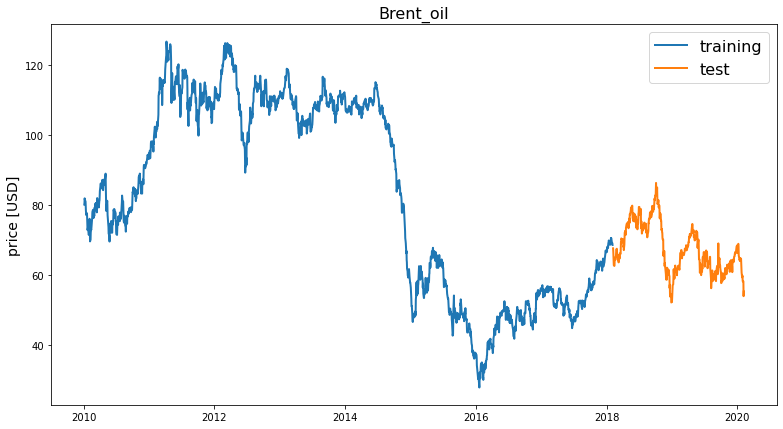

In [97]:
line_plot(train[target_col], test[target_col], 'training', 'test', title='Brent_oil')

In [108]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [109]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [110]:

def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

In [111]:

def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [112]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 100
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [113]:

train, test, X_train, X_test, y_train, y_test = prepare_data(
    hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [114]:
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/20
62/62 [==============================] - 2s 5ms/step - loss: nan
Epoch 2/20
62/62 [==============================] - 0s 5ms/step - loss: nan
Epoch 3/20
62/62 [==============================] - 0s 5ms/step - loss: nan
Epoch 4/20
62/62 [==============================] - 0s 5ms/step - loss: nan
Epoch 5/20
62/62 [==============================] - 0s 5ms/step - loss: nan
Epoch 6/20
62/62 [==============================] - 0s 5ms/step - loss: nan
Epoch 7/20
62/62 [==============================] - 0s 5ms/step - loss: nan
Epoch 8/20
62/62 [==============================] - 0s 5ms/step - loss: nan
Epoch 9/20
62/62 [==============================] - 0s 5ms/step - loss: nan
Epoch 10/20
62/62 [==============================] - 0s 5ms/step - loss: nan
Epoch 11/20
62/62 [==============================] - 0s 5ms/step - loss: nan
Epoch 12/20
62/62 [==============================] - 0s 4ms/step - loss: nan
Epoch 13/20
62/62 [==============================] - 0s 5ms/step - loss: nan
Epoch 14

In [115]:

targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').